In [34]:
library(Seurat)
library(ggplot2)
library(patchwork)
library(dplyr)
library(reshape2)
library(ComplexHeatmap)
library(grid)
library(circlize)
library(aplot)

In [45]:
#The processed segment × celltypes files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/
obj_segment <- readRDS('data/Segment_celltypes_marmoset.rds')

In [46]:
#The processed segment × genes files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/
obj_segment_gene <- readRDS('data/Segment_genes_marmoset.rds')

In [50]:
#The segment border files can be downloaded at https://db.cngb.org/stomics/mbcsta/download/ or https://github.com/haoshijie13/MCCSTA
Border <- read.csv('data/Border.txt')

In [24]:
#pre-processed region × celltypes seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_mar <- readRDS('data/region_cell/marmoset.rds')
obj_mac <- readRDS('data/region_cell/macaque.rds')
obj_mou <- readRDS('data/region_cell/mouse.rds')
obj_hum <- readRDS('data/region_cell/human.rds')
obj_mar2 <- readRDS('data/region_cell/marmoset2.rds')
obj_mac2 <- readRDS('data/region_cell/macaque2.rds')
obj_mac3 <- readRDS('data/region_cell/macaque3.rds')

#pre-processed region × genes seurat object, detail see this study Method, download from https://db.cngb.org/stomics/mbcsta/download/
obj_mar_gene <- readRDS('data/region_gene/marmoset.rds')
obj_mac_gene <- readRDS('data/region_gene/macaque.rds')
obj_mou_gene <- readRDS('data/region_gene/mouse.rds')
obj_hum_gene <- readRDS('data/region_gene/human.rds')

In [28]:
source('R_function/Pr_Al.R')
#calculate correlation between cell type distributions with Pr-Al Index (CI, Correlation with Index)
#Identify Pr or Al cell types
obj_mar <- CI_cal(obj_mar,cor_var='Pr-Al-Index',assays='Neuron')
obj_mac <- CI_cal(obj_mac,cor_var='Pr-Al-Index',assays='Neuron')
obj_mou <- CI_cal(obj_mou,cor_var='Pr-Al-Index',assays='Neuron')
obj_hum <- CI_cal(obj_hum,cor_var='Pr-Al-Index',assays='Neuron')
obj_mar2 <- CI_cal(obj_mar2,cor_var='Pr-Al-Index',assays='Neuron')
obj_mac2 <- CI_cal(obj_mac2,cor_var='Pr-Al-Index',assays='Neuron')
obj_mac3 <- CI_cal(obj_mac3,cor_var='Pr-Al-Index',assays='Neuron')

#calculate correlation between gene expression with Pr-Al Index (CI, Correlation with Index)
#Identify Pr or Al genes
obj_mar_gene <- CI_cal(obj_mar_gene,cor_var='Pr-Al-Index',assays='RNA')
obj_mac_gene <- CI_cal(obj_mac_gene,cor_var='Pr-Al-Index',assays='RNA')
obj_mou_gene <- CI_cal(obj_mou_gene,cor_var='Pr-Al-Index',assays='RNA')
#calculate correlation between gene expression with Gene-PC1 (replaced Pr-Al Index)
obj_hum_gene <- CI_cal(obj_hum_gene,cor_var='Gene-PC1',assays='RNA')

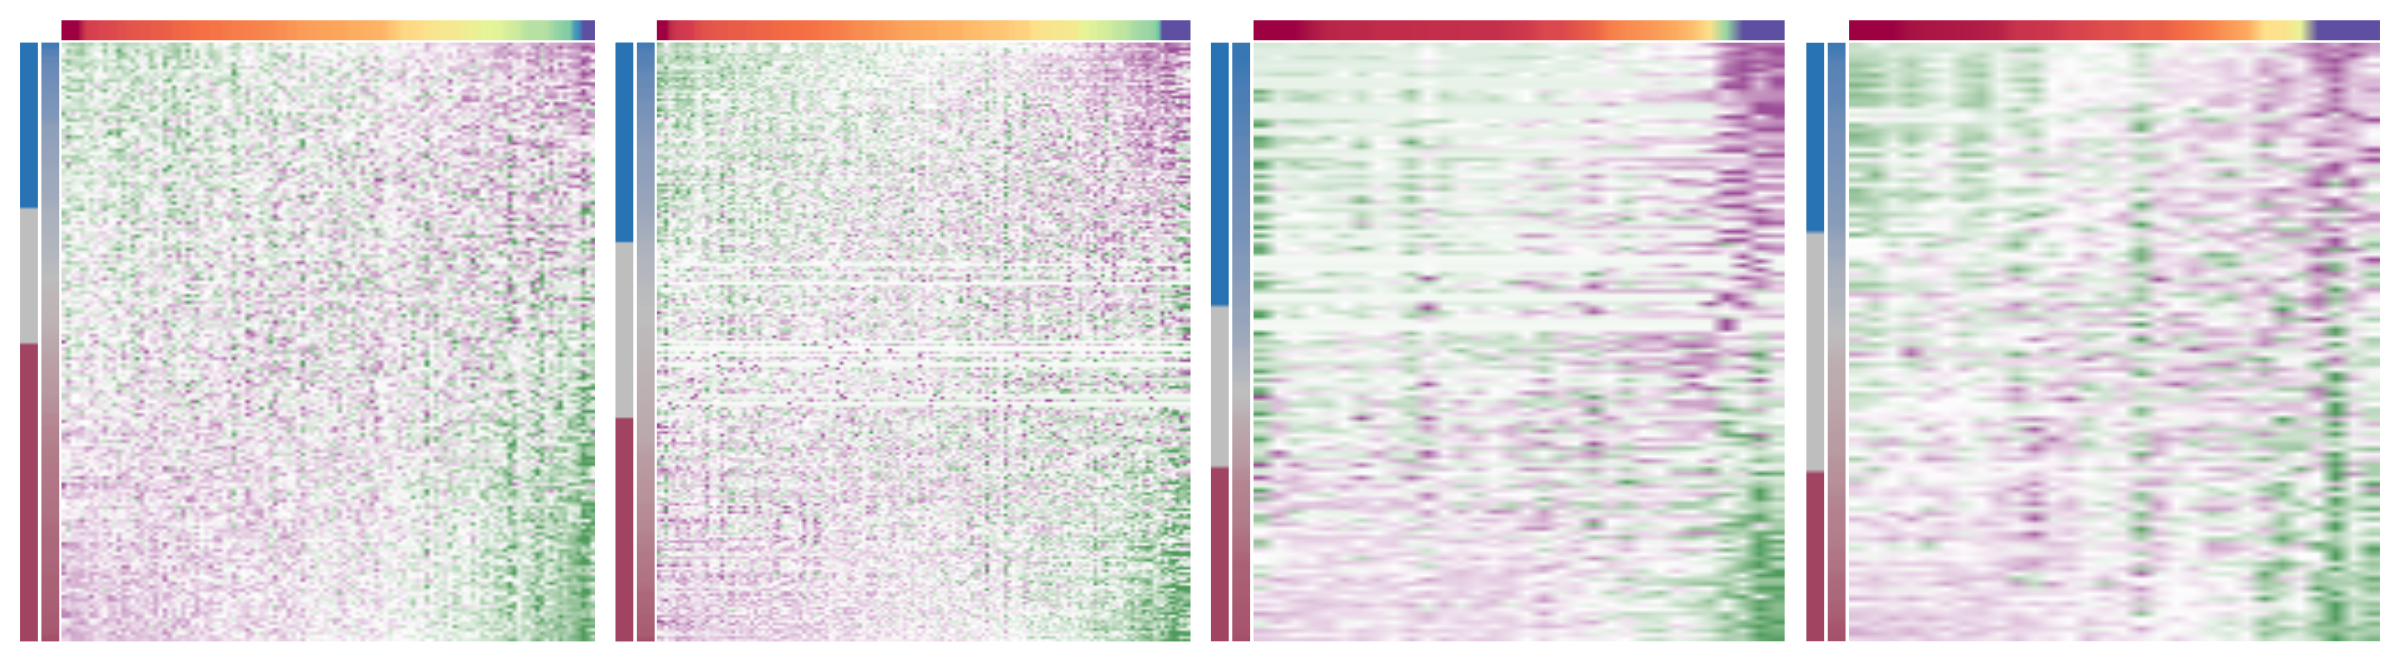

In [43]:
source('R_function/Pr_Al.R')
options(repr.plot.width=20,repr.plot.height=5.5)
p1 <- ggplotify::as.ggplot(plot_celltype_heatmap(obj_mar))+
ggplotify::as.ggplot(plot_celltype_heatmap(obj_mac))+
ggplotify::as.ggplot(plot_celltype_heatmap(obj_hum))+
ggplotify::as.ggplot(plot_celltype_heatmap(obj_mou))+
plot_layout(ncol=4)
p1

In [30]:
source('R_function/Pr_Al.R')
p <- plot_celltype_percent(obj_mar)

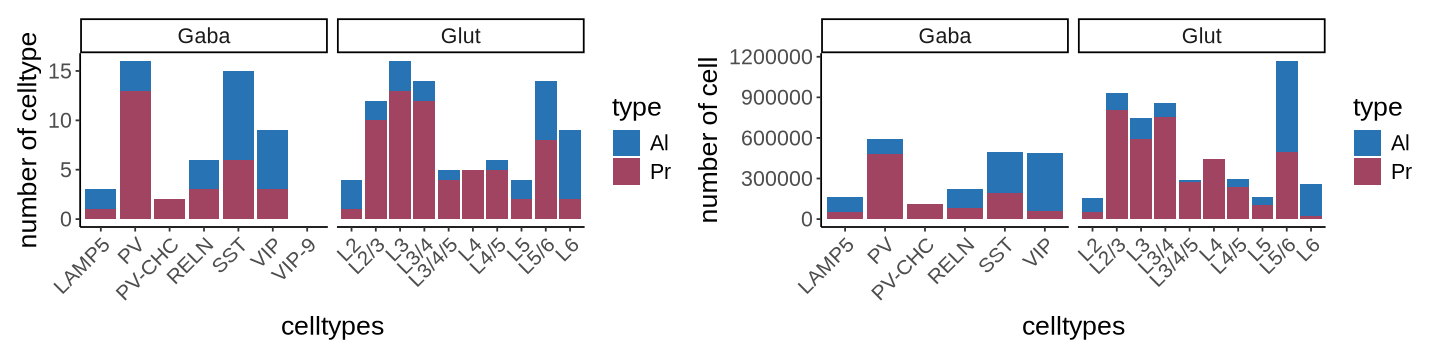

In [32]:
options(repr.plot.width=12,repr.plot.height=3)
p$p1+p$p2

In [44]:
head(obj_mar[['Neuron']]@meta.features[c('L2/3-11','L6-6'),])

,celltype_raw,cluster1,cluster2,celltype,CI,p.value,type
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
L2/3-11,L2/3_9,Glut,L2/3,L2/3-11,0.8398050,5.055838e-32,Pr
L6-6,L6_10,Glut,L6,L6-6,-0.8580668,8.769178e-35,Al


Centering and scaling data matrix



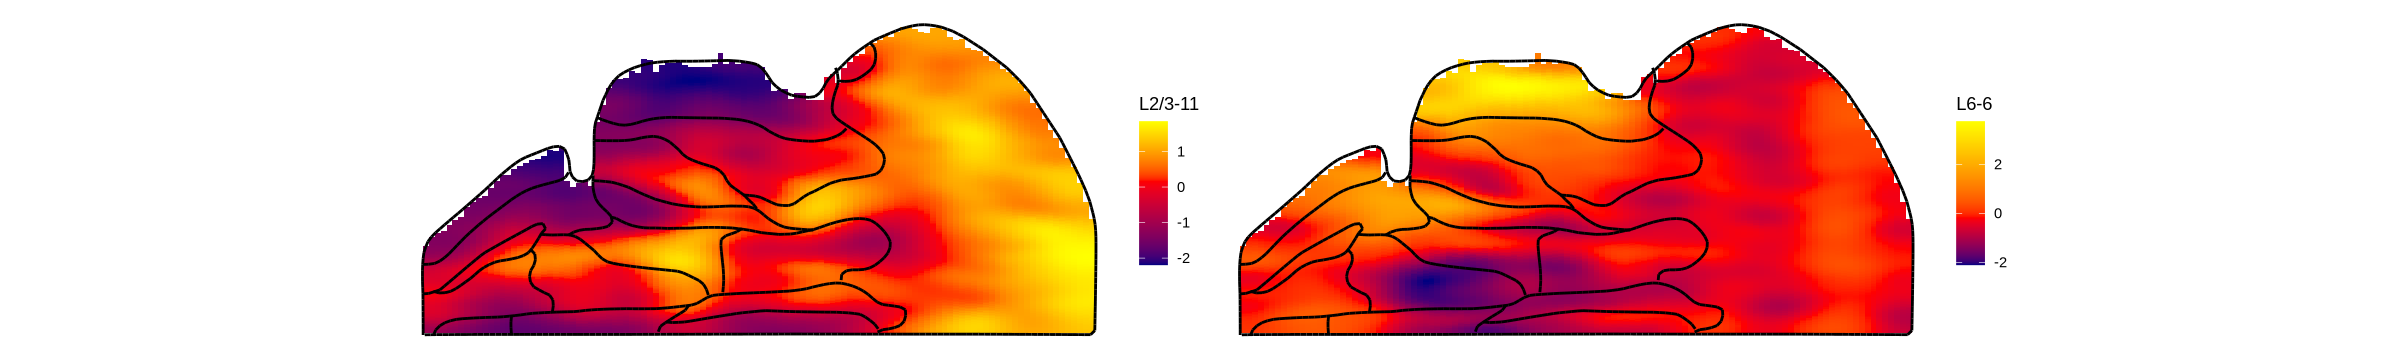

In [69]:
source('R_function/segment_plot.R')
obj_segment <- ScaleData(obj_segment,features = c('L2/3-11','L6-6'),assay = 'Neuron_smooth')
#plot cell type distribution use plot_feature function from segment_plot.R
options(repr.plot.width=20,repr.plot.height=3)
plot_features(obj_segment,features = c('L2/3-11','L6-6'),assays='Neuron_smooth',vmid=0.5,slot='scale.data')

In [59]:
head(obj_mar_gene[['RNA']]@meta.features[c('VAV3','AGL','CNIH2','TMEM158'),])

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,homo,homoname,homo_exp,CI,p.value,type
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<chr>
VAV3,7950.017,825550313,355663347,1.3023820,FALSE,TRUE,VAV3,TRUE,0.9419523,7.300607e-56,Pr
AGL,6518.069,360335195,238804084,1.2999779,FALSE,FALSE,None,FALSE,0.8976731,2.221054e-42,Pr
CNIH2,2810.431,22466492,44765239,0.5018736,FALSE,TRUE,CNIH2,TRUE,-0.9024629,1.659477e-43,Al
TMEM158,2874.103,11650756,46823772,0.2488214,FALSE,FALSE,None,FALSE,-0.8875074,3.656605e-40,Al


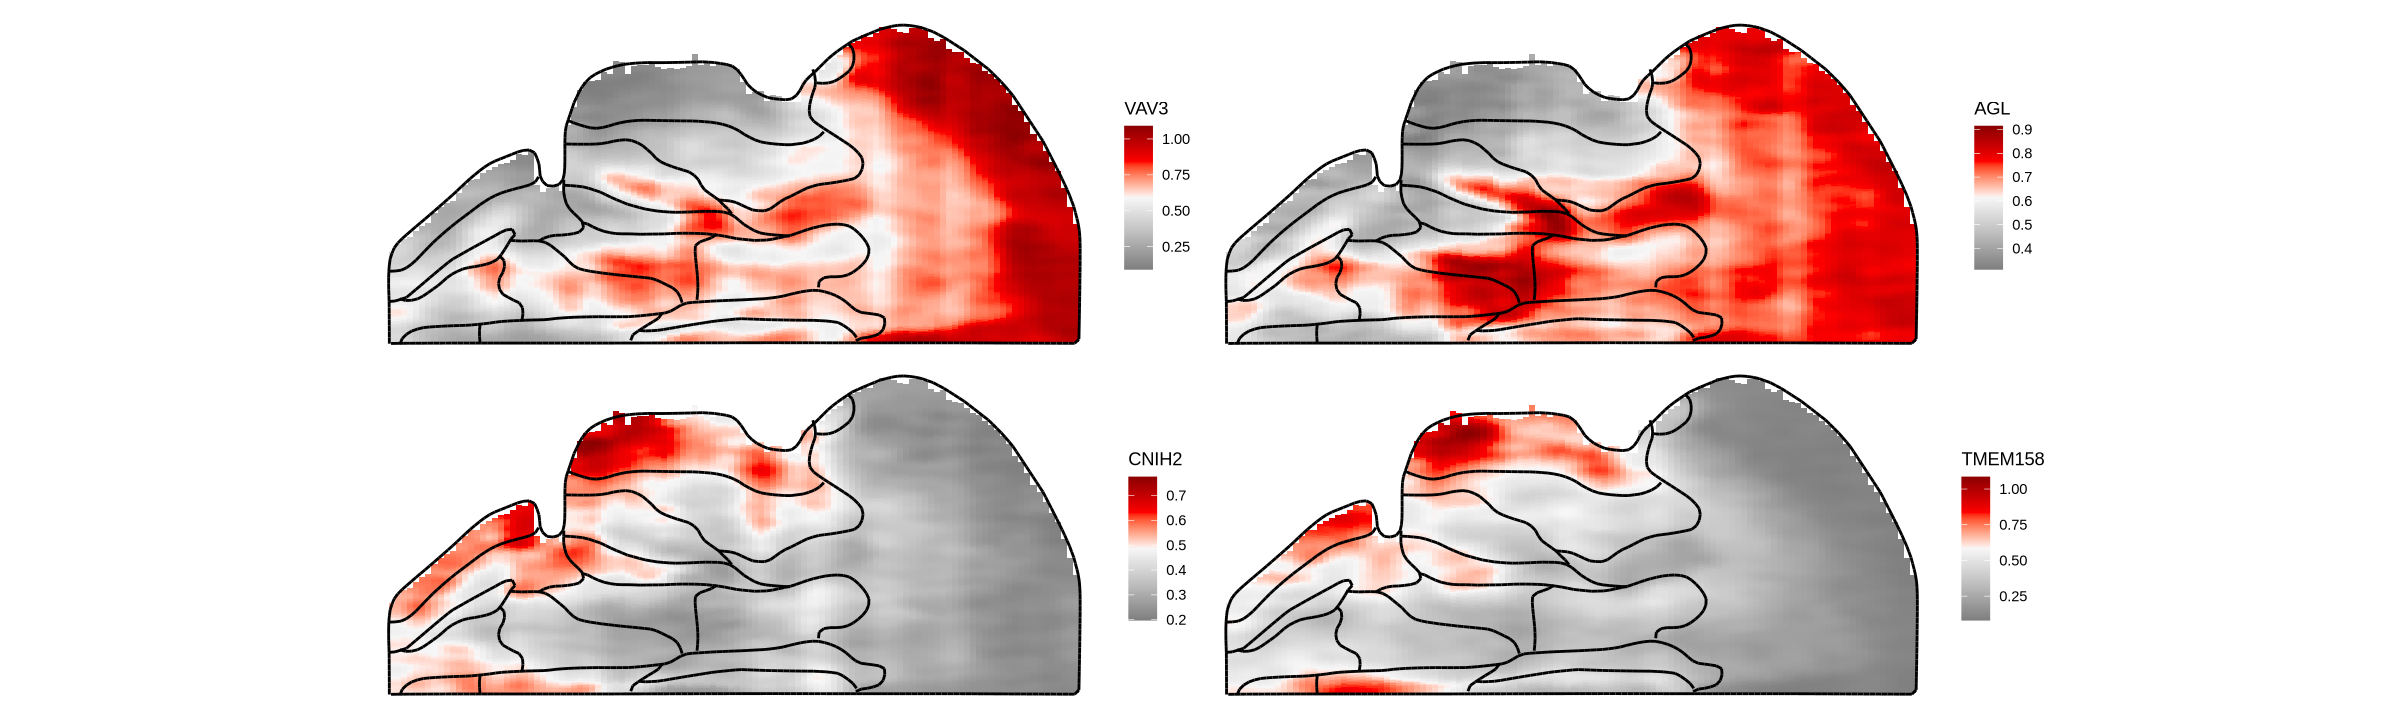

In [81]:
source('R_function/segment_plot.R')
#plot cell type distribution use plot_feature function from segment_plot.R
options(repr.plot.width=20,repr.plot.height=6)
plot_features(obj_segment_gene,features = c('VAV3','AGL','CNIH2','TMEM158'),assays='RNA',slot='data',
              color = c('gray50','gray','gray97','red','darkred'))+plot_layout(ncol=2)

In [82]:
for(i in c('VAV3','AGL','CNIH2','TMEM158','RHOBTB3','GAP43')){
    p <- plot_features(obj_segment_gene,features = i,assays='RNA',slot='data',color = c('gray50','gray','gray97','red','darkred'))
    save_png_plot(p,dir_path = '~/Marmoset_Brain/Summary/plot/EI_analysis/Gene/',name = i)
    }

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


NULL
